## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


boston = pd.read_csv("boston-dataset.csv")
X = boston.drop('medv', axis=1)  # Remove a coluna 'MEDV' do DataFrame X
y = boston['medv']  # Define y como a coluna 'MEDV' do DataFrame boston


In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
X = pd.get_dummies(X, drop_first = True)
print(X.info())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


DecisionTreeRegressor(max_depth=8)

In [5]:

mse1 = mean_squared_error(y_train, regr_1.predict(X_train))
mse2 = mean_squared_error(y_train, regr_2.predict(X_train))

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(), mse1).replace(".", ","))
print(template.format(regr_2.get_depth(), mse2).replace(".", ","))


O MSE da árvore com profundidade=2 é: 25,85
O MSE da árvore com profundidade=8 é: 1,80


n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035
3,0.607844,0.608277,0.596417,0.625875,0.634217,0.645757,0.645757,0.645757
4,0.617247,0.672232,0.676667,0.627247,0.682184,0.665746,0.658618,0.658618
5,0.746161,0.728635,0.728312,0.681329,0.738481,0.717710,0.710582,0.702706
6,0.743551,0.732142,0.731462,0.664891,0.731649,0.722235,0.717054,0.709117
7,0.743005,0.729114,0.726515,0.664906,0.727585,0.722963,0.718808,0.705538
8,0.751123,0.730750,0.730650,0.675880,0.734097,0.735779,0.722554,0.708404


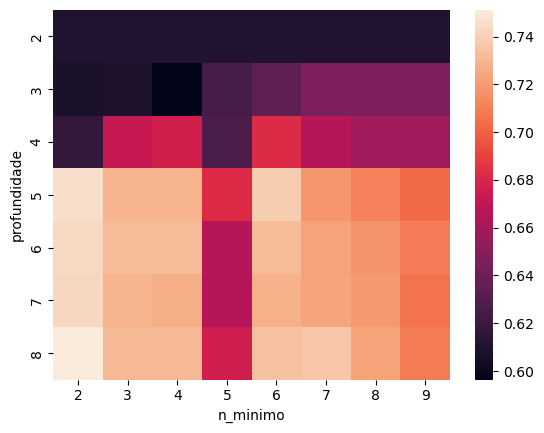

In [7]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_2.fit(X_train, y_train)
        mse1 = regr_2.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [8]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.60760230e-02, 4.24116628e-02, 4.64417640e-02,
        6.06139108e-02, 9.33006812e-02, 1.08039463e-01, 1.15017661e-01,
        1.15206747e-01, 1.65819797e-01, 1.70190045e-01, 1.71920185e-01,
        3.06995609e-01, 4.00081328e-01, 4.47497801e-01, 5.02500496e-01,
        5.47321975e-01, 5.65970286e-01, 5.74680079e-01, 6.84263688e-01,
        6.98850746e-01, 1.19694341e+00, 2.78056299e+00, 4.52477476e+00,
        5.28170375e+00, 1.70606107e+01, 4.16718568e+01]),
 'impurities': array([11.12334239, 11.14941841, 11.19183007, 11.23827184, 11.29888575,
        11.48548711, 11.59352658, 11.70854424, 11.93895773, 12.10477753,
        12.27496757, 12.61880794, 12.92580355, 13.32588488, 13.77338268,
        14.27588317, 14.82320515, 15.38917544, 15.96385551, 16.6481192 ,
        17.34696995, 18.54391335, 21.32447635, 25.84925111, 31.13095486,
        48.19156561, 89.86342242])}

Text(0, 0.5, 'Impureza total das folhas')

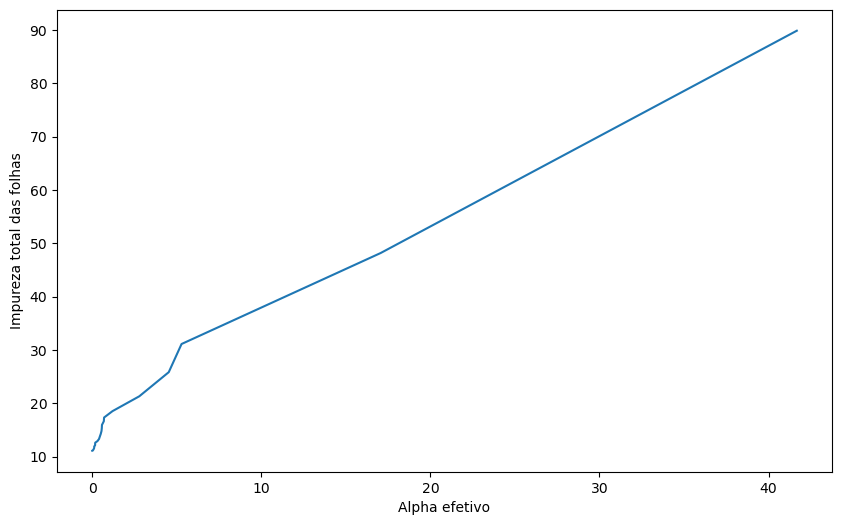

In [10]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [11]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [21]:
clfs

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0260760229789746, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.042411662802193884, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.046441764040711514, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.06061391081029471, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.09330068117320273, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.1080394631180483, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.11501766063270102, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.11520674672518866, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.16581979732374874, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.1701900454908597, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.17192018469654813, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.306995608613033, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.40008132774323, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.44749780

Text(0, 0.5, 'Profundidade da árvore')

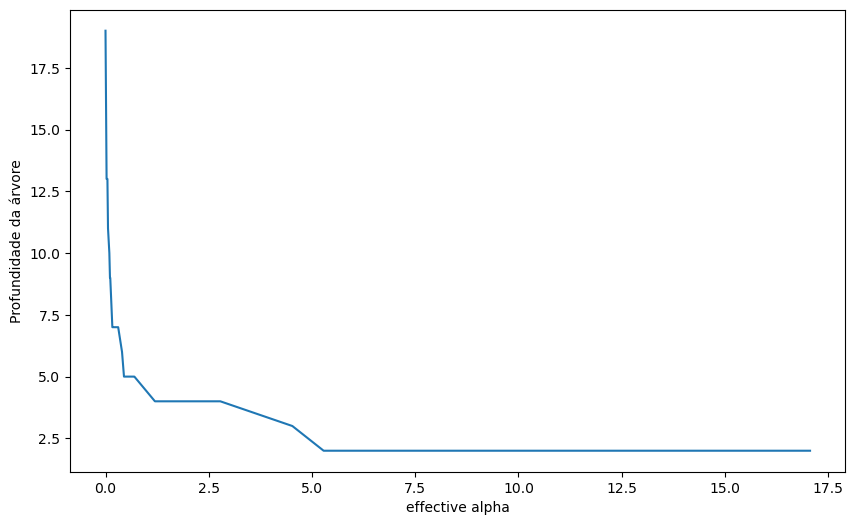

In [12]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [14]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]



### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

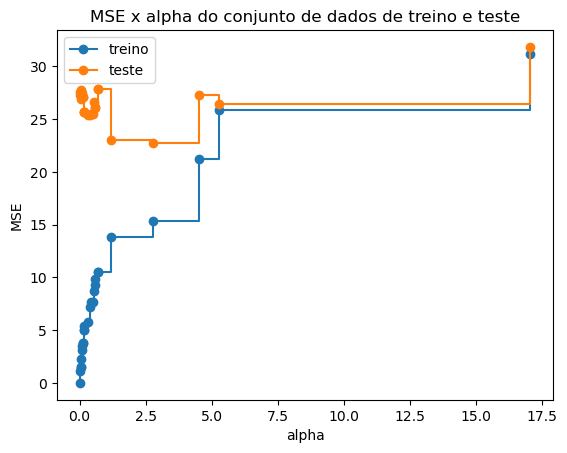

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [22]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=5.5)
arvore_final.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=5.5, random_state=0)

### 7. Visualize esta árvore.

In [23]:
print(f"Profundidade: {arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}")
print(f"MSE na base de testes: {mean_squared_error(y_test , arvore_final.predict(X_test )):.2f}")

Profundidade: 2
R-quadrado na base de testes: 0.53
MSE na base de testes: 31.85


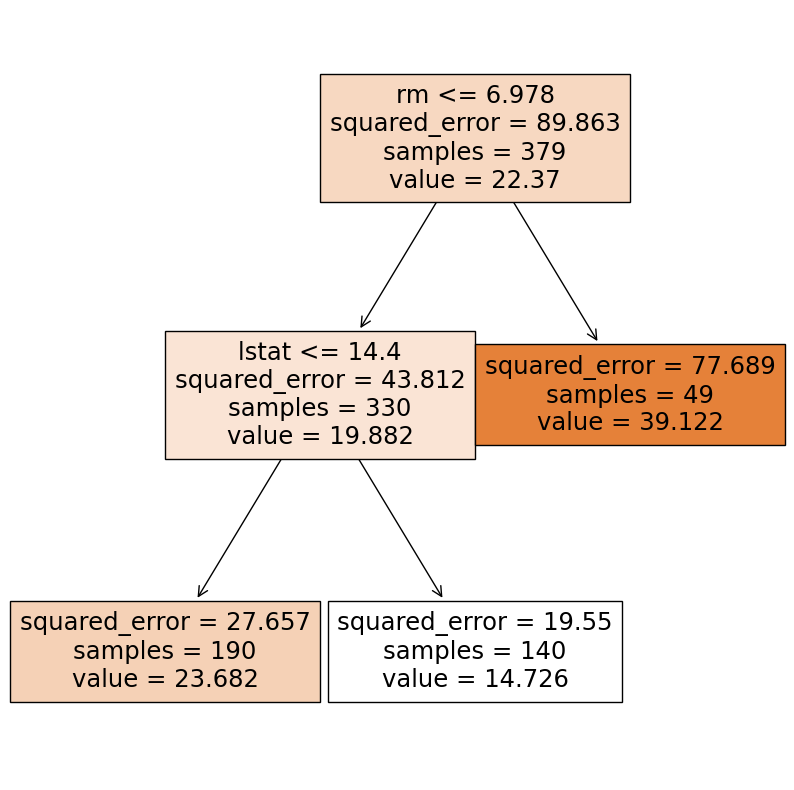

In [24]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final, 
                    feature_names=X.columns,  
                    filled=True) 